In [79]:
import pandas as pd
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score


In [80]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [81]:
# Cargue de la base de datos completa de PQR
import gdown
import pandas as pd

# ID del archivo en Google Drive
file_id = "1zRWAk78WrCSYFQgpuPEvreiLIQ-N4N1O"
url = f"https://drive.google.com/uc?id={file_id}"

# Descargar el archivo
gdown.download(url, "archivo.csv", quiet=False)

# Cargar en DataFrame
df_cundinamarca = pd.read_csv("archivo.csv", sep=",")
df_cundinamarca.head()

Downloading...
From: https://drive.google.com/uc?id=1zRWAk78WrCSYFQgpuPEvreiLIQ-N4N1O
To: /content/archivo.csv
100%|██████████| 6.94M/6.94M [00:00<00:00, 25.7MB/s]


,id_registro,periodo,mes,canal_pqr,cod_depto_peticion,cod_mpio_peticion,id_afectado,parentesco_afectado,genero_afectado,afec_edad,...,cod_motgen,motivo_general,cod_motesp,motivo_especifico,patologia_1,patologia_tipo,cie_10,alto_costo,riesgo_vida,tipo_falla
0,402,2023,7,Personalizado,25,25175,US- 000000145093,Cónyuge,HOMBRE,87,...,101,FALTA DE OPORTUNIDAD EN LA PRESTACIÓN DE TECNO...,10104,FALTA DE OPORTUNIDAD EN LA ENTREGA O ENTREGA I...,ENFERMEDADES CRÓNICAS NO TRASMISIBLES CARDIOVA...,HTA (HIPERTENSIÓN ARTERIAL),HIPERPLASIA DE LA PRÓSTATA,No aplica,NO,Falta de oportunidad en entrega
1,702,2023,7,Personalizado,25,25175,US- 000000262727,A nombre propio,MUJER,67,...,101,FALTA DE OPORTUNIDAD EN LA PRESTACIÓN DE TECNO...,10104,FALTA DE OPORTUNIDAD EN LA ENTREGA O ENTREGA I...,ENFERMEDADES CRÓNICAS NO TRASMISIBLES CARDIOVA...,HTA (HIPERTENSIÓN ARTERIAL),PRESENCIA DE MARCAPASO CARDIACO,No aplica,NO,Falta de oportunidad en entrega
2,940,2023,7,Personalizado,25,25394,US- 000001465268,Cónyuge,HOMBRE,68,...,101,FALTA DE OPORTUNIDAD EN LA PRESTACIÓN DE TECNO...,10104,FALTA DE OPORTUNIDAD EN LA ENTREGA O ENTREGA I...,ENFERMEDADES CRÓNICAS NO TRASMISIBLES CARDIOVA...,ACV (ACCIDENTE CEREBRO VASCULAR),INFARTO AGUDO DEL MIOCARDIO,No aplica,SI,Falta de oportunidad en entrega
3,1171,2023,7,Web,25,25295,US- 000000747956,A nombre propio,HOMBRE,20,...,101,FALTA DE OPORTUNIDAD EN LA PRESTACIÓN DE TECNO...,10104,FALTA DE OPORTUNIDAD EN LA ENTREGA O ENTREGA I...,ENFERMEDADES CRÓNICAS NO TRANSMISIBLES –DIABETES,DIABETES,DIABETES MELLITUS NO INSULINODEPENDIENTE,No aplica,NO,Falta de oportunidad en entrega
4,1772,2023,7,Telefónico,25,25862,US- 000001559755,Hijo (A),HOMBRE,61,...,101,FALTA DE OPORTUNIDAD EN LA PRESTACIÓN DE TECNO...,10104,FALTA DE OPORTUNIDAD EN LA ENTREGA O ENTREGA I...,ENFERMEDADES CRÓNICAS NO TRANSMISIBLES –DIABETES,DIABETES,DIABETES MELLITUS INSULINODEPENDIENTE,No aplica,SI,Falta de oportunidad en entrega


In [82]:
#Cantidad de filas y columnas
df_cundinamarca.shape

(9955, 35)

In [83]:
df_cundinamarca.columns

Index(['id_registro', 'periodo', 'mes', 'canal_pqr', 'cod_depto_peticion',
       'cod_mpio_peticion', 'id_afectado', 'parentesco_afectado',
       'genero_afectado', 'afec_edad', 'rango_edad_afectado',
       'nivel_educativo_afectado', 'regimen_afiliacion_afectado',
       'grupo_etnico_afectado', 'poblacion_especial_afectado',
       'cod_depto_afectado', 'cod_mpio_afectado', 'nombre_entidad',
       'tipo_vigencia_sns', 'codigo_sns_entidad', 'ent_alias_sn',
       'ent_cod_depto', 'ent_cod_mpio', 'cod_macromot', 'macromotivo',
       'cod_motgen', 'motivo_general', 'cod_motesp', 'motivo_especifico',
       'patologia_1', 'patologia_tipo', 'cie_10', 'alto_costo', 'riesgo_vida',
       'tipo_falla'],
      dtype='object')

**Comparación entre grupos relevantes**

In [85]:
# Porcentaje de cada categoría en riesgo_vida
porcentajes_riesgo = df_cundinamarca['riesgo_vida'].value_counts(normalize=True) * 100
porcentajes_riesgo = porcentajes_riesgo.sort_index()  # opcional: ordenar por valor de riesgo
print(porcentajes_riesgo)

riesgo_vida
NO    46.750377
SI    53.249623
Name: proportion, dtype: float64


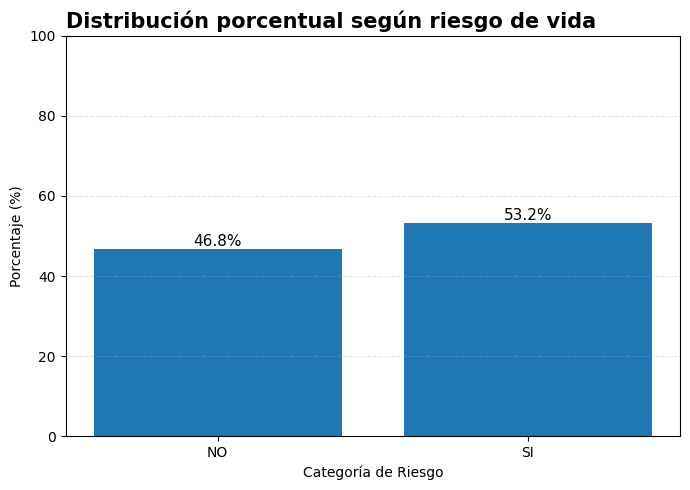

In [131]:
# ===== Calcular porcentajes =====
porcentajes_riesgo = (
    df_cundinamarca['riesgo_vida']
    .value_counts(normalize=True) * 100
)

porcentajes_riesgo = porcentajes_riesgo.sort_index()

# ===== Gráfico =====
fig, ax = plt.subplots(figsize=(7, 5))

bars = ax.bar(
    porcentajes_riesgo.index.astype(str),
    porcentajes_riesgo.values
)

# ===== Estética =====
ax.set_title(
    "Distribución porcentual según riesgo de vida",
    fontsize=15,
    weight="bold",
    loc="left"
)

ax.set_xlabel("Categoría de Riesgo")
ax.set_ylabel("Porcentaje (%)")

ax.set_ylim(0, 100)

ax.grid(axis="y", linestyle="--", alpha=0.3)

# ===== Etiquetas de porcentaje =====
for bar in bars:
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width()/2,
        height,
        f"{height:.1f}%",
        ha="center",
        va="bottom",
        fontsize=11
    )

plt.tight_layout()
plt.show()

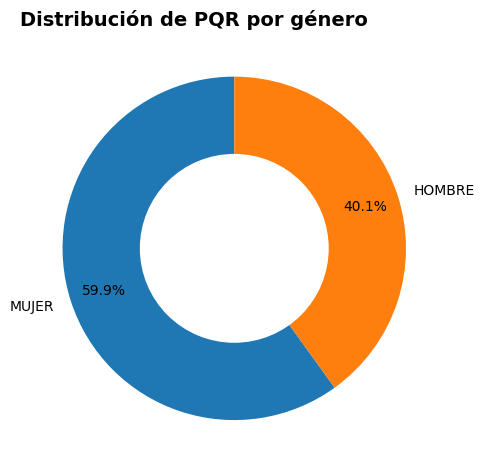

In [103]:
# ===== Conteo por género =====
conteo = df_cundinamarca["genero_afectado"].value_counts()

# porcentajes
porcentajes = conteo / conteo.sum() * 100

# ===== Gráfico donut =====
fig, ax = plt.subplots(figsize=(5, 5))

wedges, texts, autotexts = ax.pie(
    porcentajes,
    labels=porcentajes.index,
    autopct="%1.1f%%",
    startangle=90,
    pctdistance=0.8
)

# agujero central (donut)
centro = plt.Circle((0, 0), 0.55, fc="white")
ax.add_artist(centro)

ax.set_title(
    "Distribución de PQR por género",
    fontsize=14,
    weight="bold",
    loc="left"
)

plt.tight_layout()
plt.show()

In [141]:
# Porcentaje de cada categoría en riesgo_vida
df_cundinamarca['patologia_tipo'].value_counts(normalize=True) * 100

,proportion
patologia_tipo,
DIABETES,36.765445
HTA (HIPERTENSIÓN ARTERIAL),32.526369
IRC-ENFERMEDAD RENAL,5.293822
"EPOC (ENFERMEDAD PULMONAR OBSTRUCTIVA CRÓNICA, BRONQUITIS CRÓNICA O ENFISEMA)",5.113009
ARTRITIS REUMATOIDEA,3.535912
CÁNCER DE MAMA,3.515821
ACV (ACCIDENTE CEREBRO VASCULAR),3.395279
OBESIDAD,2.742341
CÁNCER DE PRÓSTATA,2.451030


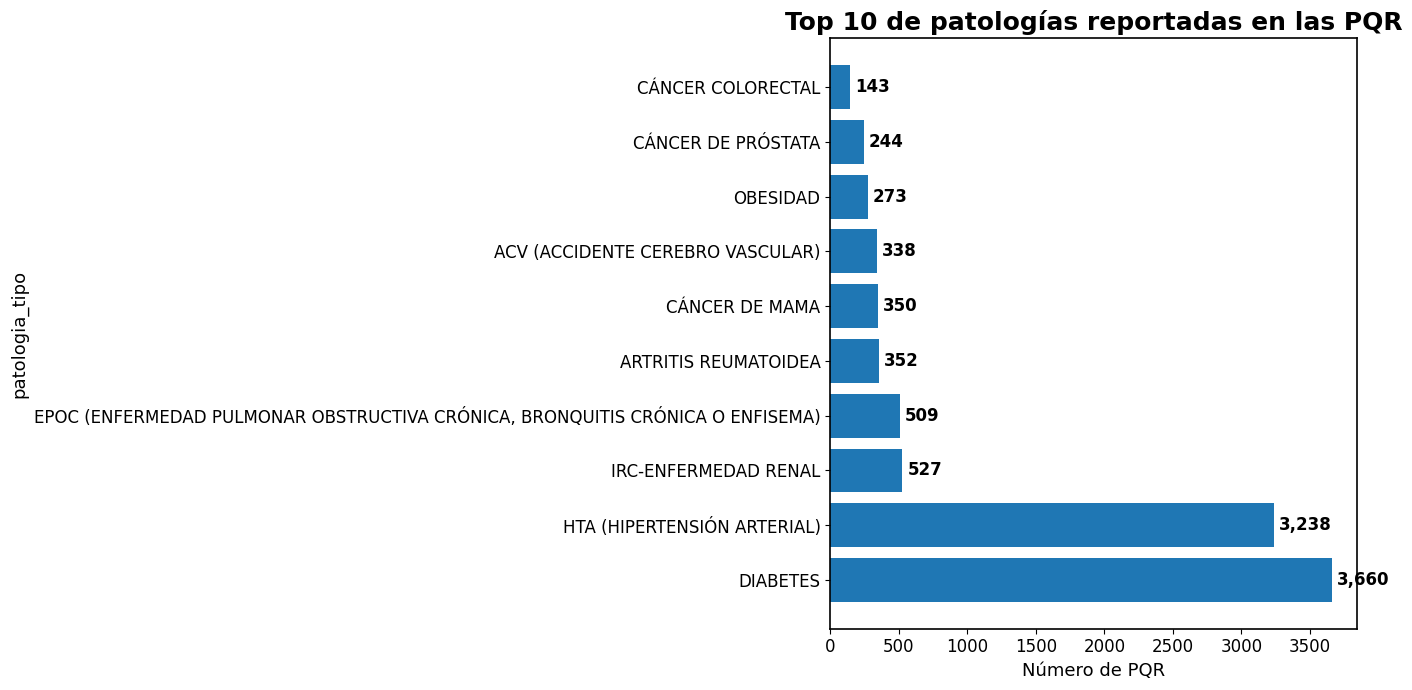

In [139]:
# ===== Conteo Top 10 =====
top_patologias = (
    df_cundinamarca["patologia_tipo"]
    .value_counts()
    .head(10)
    .sort_values(ascending=False)
)

plt.style.use("default")

fig, ax = plt.subplots(figsize=(14, 7))

bars = ax.barh(
    top_patologias.index,
    top_patologias.values,
    height=0.8
)

# ===== Título =====
ax.set_title(
    "Top 10 de patologías reportadas en las PQR",
    fontsize=18,
    weight="bold"
)

ax.set_xlabel("Número de PQR", fontsize=13)
ax.set_ylabel("patologia_tipo", fontsize=13)

# ===== Mostrar valores al final de cada barra =====
for bar in bars:
    width = bar.get_width()
    ax.text(
        width + (top_patologias.max() * 0.01),  # pequeño espacio a la derecha
        bar.get_y() + bar.get_height()/2,
        f"{int(width):,}",
        va="center",
        fontsize=12,
        weight="bold"
    )

# ===== Marco visible como la imagen =====
for spine in ax.spines.values():
    spine.set_visible(True)
    spine.set_linewidth(1.2)

ax.grid(False)

ax.tick_params(axis='y', labelsize=12)
ax.tick_params(axis='x', labelsize=12)

plt.subplots_adjust(left=0.35)

plt.tight_layout()
plt.show()

In [132]:
#Se convierte a binaria la variable de riesgo vital y se almacena en una nueva variable llamada riesgo_bin
df_cundinamarca["riesgo_bin"] = df_cundinamarca["riesgo_vida"].map({"SI":1, "NO":0})

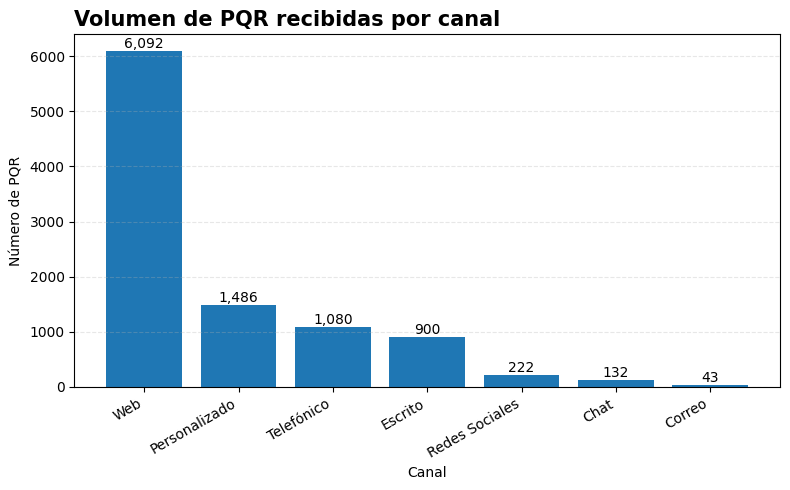

In [102]:
# ===== Conteo de PQR por canal =====
conteo = (
    df_cundinamarca["canal_pqr"]
    .value_counts()
    .sort_values(ascending=False)
)

# ===== Gráfico =====
fig, ax = plt.subplots(figsize=(8, 5))

bars = ax.bar(conteo.index, conteo.values)

ax.set_title(
    "Volumen de PQR recibidas por canal",
    fontsize=15,
    weight="bold",
    loc="left"
)

ax.set_xlabel("Canal")
ax.set_ylabel("Número de PQR")

ax.grid(axis="y", linestyle="--", alpha=0.3)

plt.xticks(rotation=30, ha="right")

for bar in bars:
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width()/2,
        height,
        f"{int(height):,}",
        ha="center",
        va="bottom",
        fontsize=10
    )

plt.tight_layout()
plt.show()

In [90]:
#probabilidad relativa de riesgo por rango de edades.
pd.crosstab(df_cundinamarca["rango_edad_afectado"], df_cundinamarca["riesgo_bin"], normalize="index") * 100

riesgo_bin,0,1
rango_edad_afectado,,
DE 0 A 5 AÑOS,0.000000,100.000000
DE 13 A 17 AÑOS,22.666667,77.333333
DE 18 A 24 AÑOS,40.000000,60.000000
DE 25 A 29 AÑOS,41.935484,58.064516
DE 30 A 37 AÑOS,44.582043,55.417957
DE 38 A 49 AÑOS,46.243386,53.756614
DE 50 A 62 AÑOS,47.208791,52.791209
DE 6 A 12 AÑOS,1.851852,98.148148
MAYOR DE 63 AÑOS,47.758478,52.241522


In [91]:
# Calcular tabla de probabilidad relativa de riesgo por rango de edades
tabla_riesgo = pd.crosstab(
    df_cundinamarca["rango_edad_afectado"],
    df_cundinamarca["riesgo_bin"],
    normalize="index"
) * 100  # Convertimos a porcentaje

# Renombrar columnas para que se vean más claras
tabla_riesgo.columns = ["Riesgo Bajo", "Riesgo Alto"]

# Redondear a 2 decimales
tabla_riesgo = tabla_riesgo.round(2)

# Opcional: ordenar por rango de edad si quieres
tabla_riesgo = tabla_riesgo.sort_index()

# Mostrar tabla bonita
print("Probabilidad relativa de riesgo por rango de edades (%)")
display(tabla_riesgo)

Probabilidad relativa de riesgo por rango de edades (%)


,Riesgo Bajo,Riesgo Alto
rango_edad_afectado,,
DE 0 A 5 AÑOS,0.00,100.00
DE 13 A 17 AÑOS,22.67,77.33
DE 18 A 24 AÑOS,40.00,60.00
DE 25 A 29 AÑOS,41.94,58.06
DE 30 A 37 AÑOS,44.58,55.42
DE 38 A 49 AÑOS,46.24,53.76
DE 50 A 62 AÑOS,47.21,52.79
DE 6 A 12 AÑOS,1.85,98.15
MAYOR DE 63 AÑOS,47.76,52.24


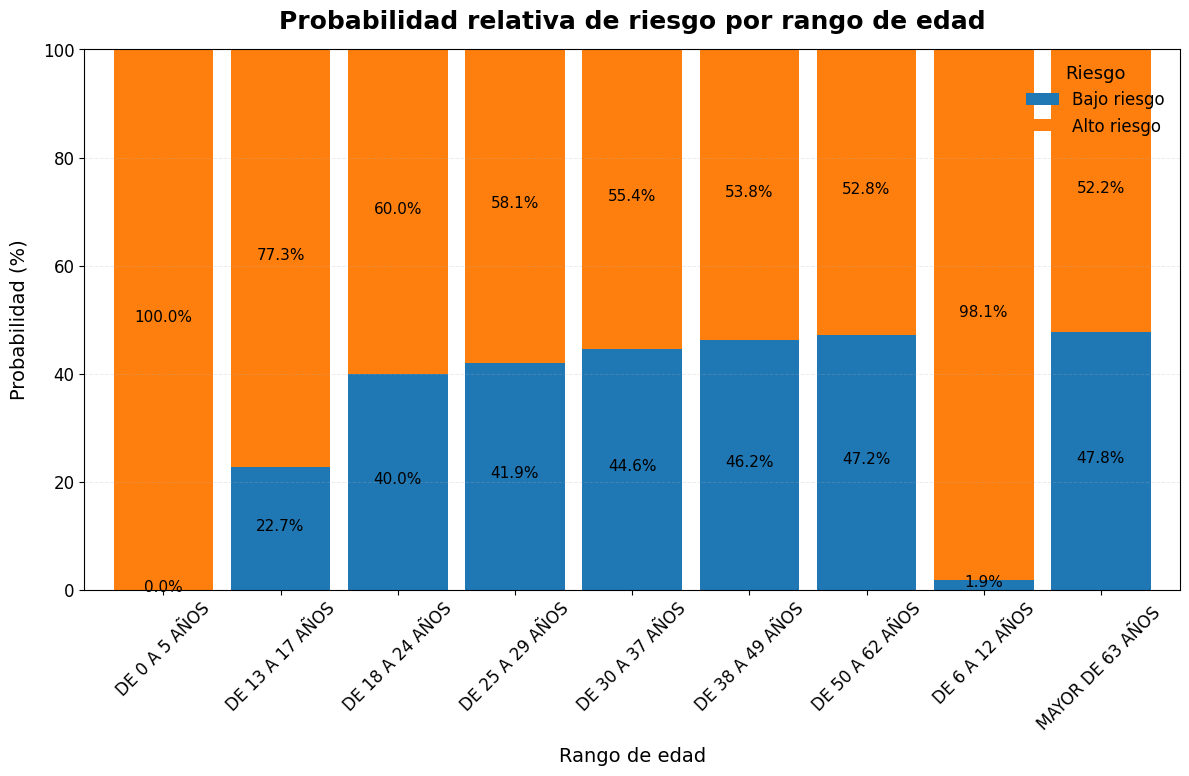

In [92]:
# ===== Tabla de probabilidad relativa de riesgo por rango de edades =====
tabla = (
    pd.crosstab(
        df_cundinamarca["rango_edad_afectado"],
        df_cundinamarca["riesgo_bin"],
        normalize="index"
    ) * 100
).sort_index()

# Renombrar las columnas para mostrar etiquetas más claras
tabla.columns = ["Bajo riesgo", "Alto riesgo"]

fig, ax = plt.subplots(figsize=(12, 7))

tabla.plot(
    kind="bar",
    stacked=True,
    ax=ax,
    width=0.85
)

# Títulos y estilo
ax.set_title("Probabilidad relativa de riesgo por rango de edad", fontsize=18, weight="bold", pad=15)
ax.set_xlabel("Rango de edad", fontsize=14, labelpad=10)
ax.set_ylabel("Probabilidad (%)", fontsize=14, labelpad=10)

ax.set_ylim(0, 100)
ax.grid(axis="y", linestyle="--", linewidth=0.7, alpha=0.25)

ax.legend(title="Riesgo", frameon=False, fontsize=12, title_fontsize=13)

plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

# Etiquetas % encima de cada segmento
for container in ax.containers:
    ax.bar_label(container, fmt="%.1f%%", label_type="center", fontsize=11, color="black", padding=2)

plt.tight_layout()
plt.subplots_adjust(bottom=0.15)  # Más espacio abajo
plt.show()

In [93]:
#probabilidad relativa de riesgo por el tipo de patología
pd.crosstab(df_cundinamarca["patologia_tipo"], df_cundinamarca["riesgo_bin"], normalize="index") * 100

riesgo_bin,0,1
patologia_tipo,,
ACV (ACCIDENTE CEREBRO VASCULAR),42.603550,57.396450
ARTRITIS REUMATOIDEA,87.215909,12.784091
CÁNCER COLORECTAL,4.895105,95.104895
CÁNCER DE MAMA,2.285714,97.714286
CÁNCER DE PRÓSTATA,4.098361,95.901639
CÁNCER DE PULMÓN,2.777778,97.222222
CÁNCER DE ÚTERO,2.941176,97.058824
CÁNCER GÁSTRICO,3.773585,96.226415
DIABETES,37.459016,62.540984


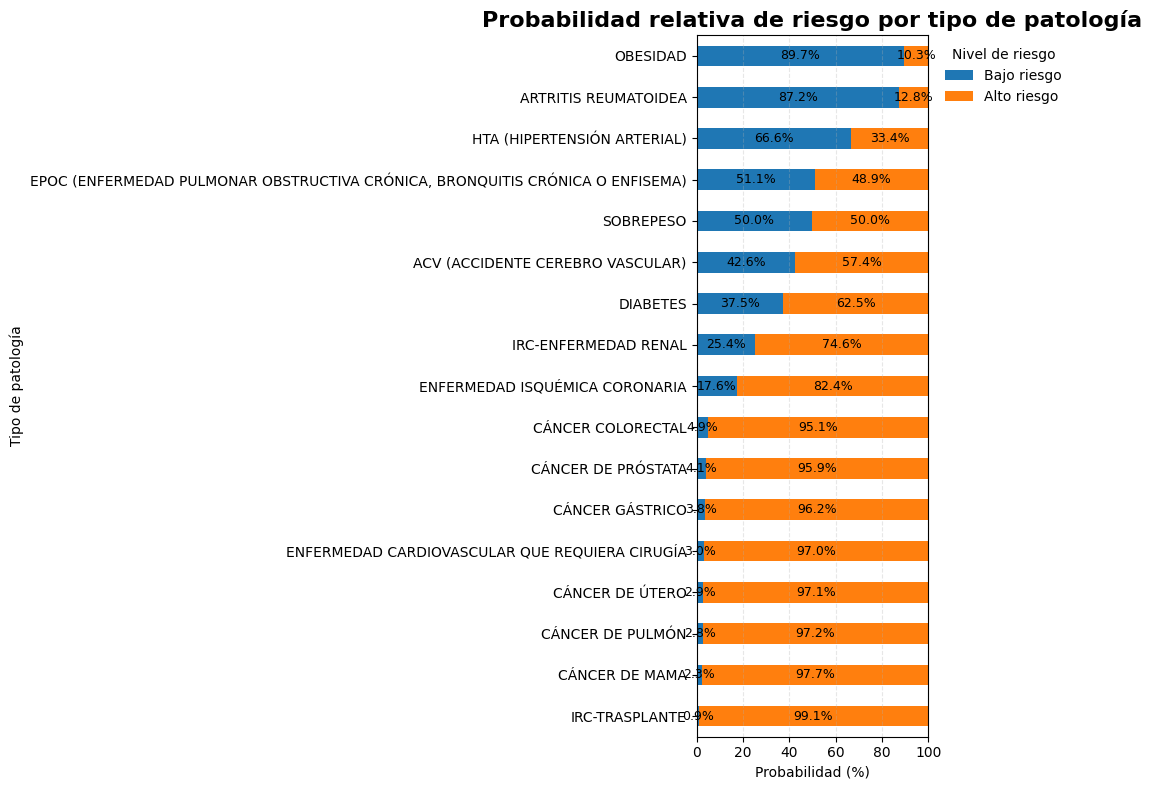

In [94]:

# ===== Tabla de probabilidades relativa de riesgo por el tipo de patología =====
tabla = (
    pd.crosstab(
        df_cundinamarca["patologia_tipo"],
        df_cundinamarca["riesgo_bin"],
        normalize="index"
    ) * 100
)

tabla = tabla.sort_values(by=1, ascending=False)
tabla.columns = ["Bajo riesgo", "Alto riesgo"]

# ===== Gráfico =====
fig, ax = plt.subplots(figsize=(11, 8))

tabla.plot(
    kind="barh",
    stacked=True,
    ax=ax
)

ax.set_title("Probabilidad relativa de riesgo por tipo de patología", fontsize=16, weight="bold")
ax.set_xlabel("Probabilidad (%)")
ax.set_ylabel("Tipo de patología")

ax.set_xlim(0, 100)
ax.grid(axis="x", linestyle="--", alpha=0.3)

ax.legend(
    title="Nivel de riesgo",
    bbox_to_anchor=(1.02, 1),
    loc="upper left",
    frameon=False
)

# Etiquetas %
for container in ax.containers:
    ax.bar_label(container, fmt="%.1f%%", label_type="center", fontsize=9)

plt.tight_layout()
plt.show()



In [95]:
#probabilidad relativa de riesgo por el motivo específico.
pd.crosstab(df_cundinamarca["tipo_falla"], df_cundinamarca["riesgo_bin"], normalize="index") * 100

riesgo_bin,0,1
tipo_falla,,
Fallas en manejo/dispensación,80.000000,20.000000
Falta de oportunidad en entrega,48.499173,51.500827
Negación de autorización,36.649215,63.350785
Negación de entrega,45.730825,54.269175


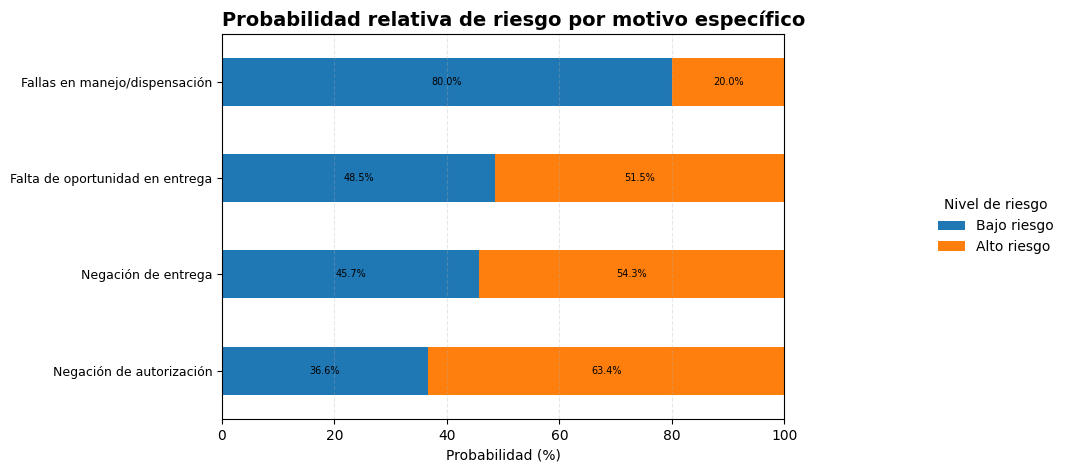

In [96]:
# ===== Tabla de probabilidades (%) relativa de riesgo por el motivo específico. =====
tabla = (
    pd.crosstab(
        df_cundinamarca["tipo_falla"],
        df_cundinamarca["riesgo_bin"],
        normalize="index"
    ) * 100
)

tabla = tabla.sort_values(by=1, ascending=False)

tabla.columns = ["Bajo riesgo", "Alto riesgo"]

# ===== Gráfico =====
fig, ax = plt.subplots(figsize=(9, 5))

tabla.plot(
    kind="barh",
    stacked=True,
    ax=ax
)

ax.set_title(
    "Probabilidad relativa de riesgo por motivo específico",
    fontsize=14,
    weight="bold",
    loc="left"
)

ax.set_xlabel("Probabilidad (%)")
ax.set_ylabel("")
ax.set_xlim(0, 100)
ax.grid(axis="x", linestyle="--", alpha=0.3)

ax.legend(
    title="Nivel de riesgo",
    bbox_to_anchor=(1.25, 0.5),
    loc="center left",
    frameon=False
)

# Etiquetas %
for container in ax.containers:
    ax.bar_label(container, fmt="%.1f%%", label_type="center", fontsize=7)

ax.tick_params(axis='y', labelsize=9)
plt.subplots_adjust(right=0.75)

plt.show()

In [97]:
#probabilidad relativa de riesgo por canal pqr.
pd.crosstab(df_cundinamarca["canal_pqr"], df_cundinamarca["riesgo_bin"], normalize="index") * 100

riesgo_bin,0,1
canal_pqr,,
Chat,40.909091,59.090909
Correo,53.488372,46.511628
Escrito,54.000000,46.000000
Personalizado,46.164199,53.835801
Redes Sociales,0.000000,100.000000
Telefónico,43.703704,56.296296
Web,48.145108,51.854892


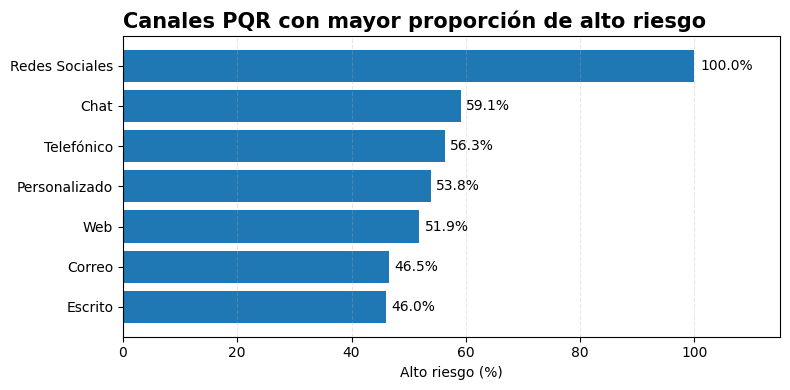

In [98]:
tabla = (
    pd.crosstab(
        df_cundinamarca["canal_pqr"],
        df_cundinamarca["riesgo_bin"],
        normalize="index"
    ) * 100
)

alto = tabla[1].sort_values(ascending=True)  # orden ranking
fig, ax = plt.subplots(figsize=(8, 4))
ax.barh(alto.index, alto.values)
ax.set_title(
    "Canales PQR con mayor proporción de alto riesgo",
    fontsize=15,
    weight="bold",
    loc="left"
)
ax.set_xlabel("Alto riesgo (%)")
ax.set_ylabel("")

ax.grid(axis="x", linestyle="--", alpha=0.3)

# etiquetas al final de cada barra
for i, v in enumerate(alto.values):
    ax.text(v + 1, i, f"{v:.1f}%", va="center", fontsize=10)

ax.set_xlim(0, max(alto.values) * 1.15)

plt.tight_layout()
plt.show()


In [99]:
#probabilidad relativa de riesgo por régimen afectado
pd.crosstab(df_cundinamarca["regimen_afiliacion_afectado"], df_cundinamarca["riesgo_bin"], normalize="index") * 100

riesgo_bin,0,1
regimen_afiliacion_afectado,,
Contributivo,46.947611,53.052389
No aplica,50.000000,50.000000
Régimen Especial,53.431373,46.568627
Subsidiado,45.765125,54.234875


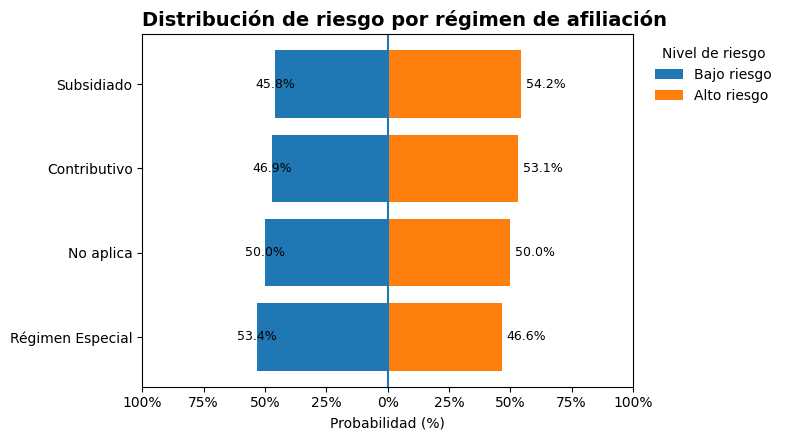

In [100]:

# ===== Probabilidad relativa de riesgo por régimen afectado=====
tabla = (
    pd.crosstab(
        df_cundinamarca["regimen_afiliacion_afectado"],
        df_cundinamarca["riesgo_bin"],
        normalize="index"
    ) * 100
)

tabla.columns = ["Bajo riesgo", "Alto riesgo"]

# ordenar por alto riesgo
tabla = tabla.sort_values(by="Alto riesgo", ascending=True)

# convertir bajo a negativo (para efecto divergente)
bajo = -tabla["Bajo riesgo"]
alto = tabla["Alto riesgo"]

# ===== Gráfico =====
fig, ax = plt.subplots(figsize=(8, 4.5))

ax.barh(tabla.index, bajo, label="Bajo riesgo")
ax.barh(tabla.index, alto, label="Alto riesgo")

ax.set_title(
    "Distribución de riesgo por régimen de afiliación",
    fontsize=14,
    weight="bold",
    loc="left"
)

# eje simétrico
ax.set_xlim(-100, 100)

# mostrar valores absolutos en el eje
ax.set_xticks(range(-100, 101, 25))
ax.set_xticklabels([f"{abs(x)}%" for x in range(-100, 101, 25)])

ax.axvline(0)  # línea central
ax.set_ylabel("")
ax.set_xlabel("Probabilidad (%)")

# etiquetas
for i, v in enumerate(alto):
    ax.text(v + 2, i, f"{v:.1f}%", va="center", fontsize=9)

for i, v in enumerate(bajo):
    ax.text(v - 8, i, f"{abs(v):.1f}%", va="center", fontsize=9)

ax.legend(title="Nivel de riesgo", frameon=False, bbox_to_anchor=(1.02, 1))

plt.tight_layout()
plt.show()


In [101]:
#Análisis estadístico de las variables predictoras o de mayor importancia
variables_categoricas = [
    "motivo_especifico",
    "rango_edad_afectado",
    "patologia_tipo",
    "tipo_falla",
    "canal_pqr",
    "regimen_afiliacion_afectado"
]

resumen_global = []

for var in variables_categoricas:
    resumen_global.append({
        "Variable": var,
        "Total_observaciones": df_cundinamarca[var].notna().sum(),
        "Categorias": df_cundinamarca[var].nunique(),
        "Moda": df_cundinamarca[var].mode().iloc[0]
    })

resumen_global_df = pd.DataFrame(resumen_global)
resumen_global_df


,Variable,Total_observaciones,Categorias,Moda
0,motivo_especifico,9955,5,NEGACIÓN PARA LA ENTREGA DE TECNOLOGÍAS EN SAL...
1,rango_edad_afectado,9955,9,MAYOR DE 63 AÑOS
2,patologia_tipo,9955,17,DIABETES
3,tipo_falla,9955,4,Negación de entrega
4,canal_pqr,9955,7,Web
5,regimen_afiliacion_afectado,9955,4,Contributivo


**Análisis predictivo básico**


In [104]:
#Variables predictoras
variables = [
    "patologia_tipo",
    "tipo_falla",
    "canal_pqr",
    "rango_edad_afectado",
    "regimen_afiliacion_afectado"
]

df_modelo = df_cundinamarca[variables + ["riesgo_bin"]].dropna()
df_modelo = pd.get_dummies(df_modelo, drop_first=True)

**Modelo predictivo simple**

In [105]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X = df_modelo.drop("riesgo_bin", axis=1)
y = df_modelo["riesgo_bin"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

modelo = LogisticRegression(max_iter=1000)
modelo.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [106]:
pd.DataFrame({
    "variable": X.columns,
    "coeficiente": modelo.coef_[0]
}).sort_values("coeficiente", ascending=False)

,variable,coeficiente
22,canal_pqr_Redes Sociales,3.758124
2,patologia_tipo_CÁNCER DE MAMA,2.962072
13,patologia_tipo_IRC-TRASPLANTE,2.483052
3,patologia_tipo_CÁNCER DE PRÓSTATA,2.285648
1,patologia_tipo_CÁNCER COLORECTAL,2.091430
6,patologia_tipo_CÁNCER GÁSTRICO,1.970660
4,patologia_tipo_CÁNCER DE PULMÓN,1.965546
31,rango_edad_afectado_DE 6 A 12 AÑOS,1.852747
8,patologia_tipo_ENFERMEDAD CARDIOVASCULAR QUE R...,1.557414
5,patologia_tipo_CÁNCER DE ÚTERO,1.347733


Los coeficientes indican asociaciones estadísticas con la probabilidad de riesgo de vida, sin implicar relaciones causales. El modelo se utiliza únicamente como apoyo para la priorización temprana.

In [107]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)
y_prob_rf = rf.predict_proba(X_test)[:,1]

from sklearn.metrics import accuracy_score, f1_score, roc_auc_score

print("RF Accuracy:", accuracy_score(y_test, y_pred_rf))
print("RF F1:", f1_score(y_test, y_pred_rf))
print("RF AUC:", roc_auc_score(y_test, y_prob_rf))


RF Accuracy: 0.6839638433210579
RF F1: 0.707196029776675
RF AUC: 0.7457349329302854


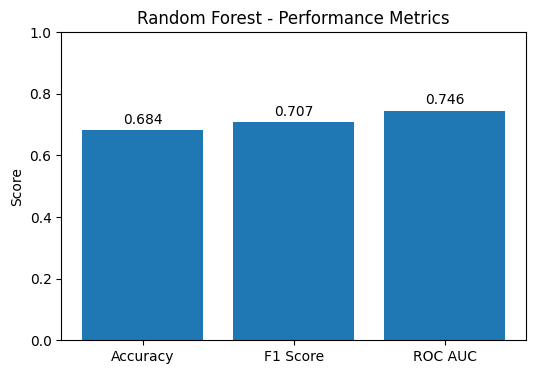

In [108]:
# ===== Modelo =====
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)
y_prob = rf.predict_proba(X_test)[:, 1]

# ===== Métricas =====
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_prob)

metrics = [acc, f1, auc]
labels = ["Accuracy", "F1 Score", "ROC AUC"]

plt.figure(figsize=(6,4))
plt.bar(labels, metrics)
plt.ylim(0, 1)
plt.title("Random Forest - Performance Metrics")
plt.ylabel("Score")

for i, v in enumerate(metrics):
    plt.text(i, v + 0.02, f"{v:.3f}", ha='center')

plt.show()


In [109]:
from xgboost import XGBClassifier

xgb = XGBClassifier(eval_metric="logloss", random_state=42)
xgb.fit(X_train, y_train)

y_pred_xgb = xgb.predict(X_test)
y_prob_xgb = xgb.predict_proba(X_test)[:,1]

print("XGB Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("XGB F1:", f1_score(y_test, y_pred_xgb))
print("XGB AUC:", roc_auc_score(y_test, y_prob_xgb))


XGB Accuracy: 0.6899899564780716
XGB F1: 0.7190533980582524
XGB AUC: 0.7566309501318004


Accuracy: 0.6899899564780716
F1: 0.7190533980582524
AUC: 0.7566309501318004


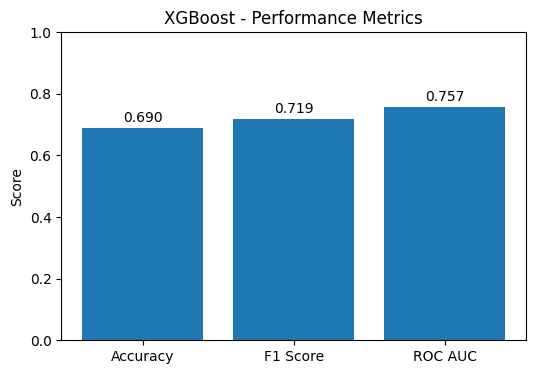

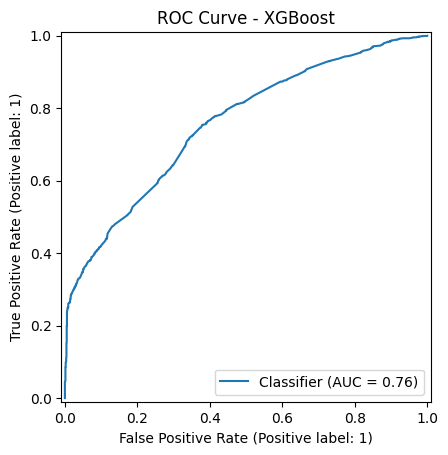

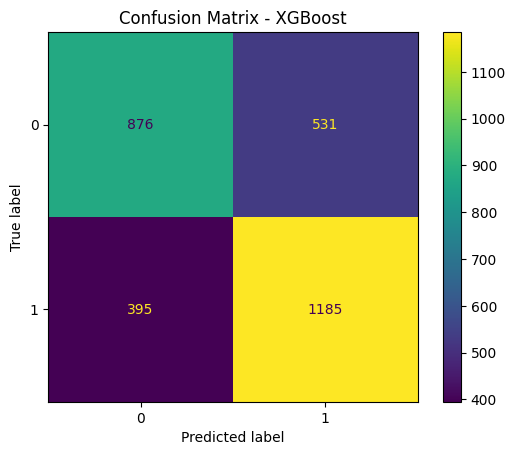

In [110]:
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from sklearn.metrics import (
    accuracy_score, f1_score, roc_auc_score,
    confusion_matrix, ConfusionMatrixDisplay,
    RocCurveDisplay
)

# ===== Modelo =====
xgb = XGBClassifier(eval_metric="logloss", random_state=42)
xgb.fit(X_train, y_train)

y_pred = xgb.predict(X_test)
y_prob = xgb.predict_proba(X_test)[:, 1]

# ===== Métricas =====
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_prob)

print("Accuracy:", acc)
print("F1:", f1)
print("AUC:", auc)


# =========================
# 1️⃣ Barras métricas
# =========================
metrics = [acc, f1, auc]
labels = ["Accuracy", "F1 Score", "ROC AUC"]

plt.figure(figsize=(6,4))
plt.bar(labels, metrics)
plt.ylim(0, 1)
plt.title("XGBoost - Performance Metrics")
plt.ylabel("Score")

for i, v in enumerate(metrics):
    plt.text(i, v + 0.02, f"{v:.3f}", ha='center')

plt.show()


# =========================
# 2️⃣ Curva ROC
# =========================
RocCurveDisplay.from_predictions(y_test, y_prob)
plt.title("ROC Curve - XGBoost")
plt.show()


# =========================
# 3️⃣ Matriz de confusión
# =========================
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot()
plt.title("Confusion Matrix - XGBoost")
plt.show()


In [111]:
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score

# Predicciones logística
y_pred_log = modelo.predict(X_test)
y_prob_log = modelo.predict_proba(X_test)[:,1]

accuracy = accuracy_score(y_test, y_pred_log)
f1 = f1_score(y_test, y_pred_log)
auc = roc_auc_score(y_test, y_prob_log)


In [112]:
comparacion = pd.DataFrame({
    "Modelo": ["Logística", "Random Forest", "XGBoost"],
    "Accuracy": [
        accuracy,
        accuracy_score(y_test, y_pred_rf),
        accuracy_score(y_test, y_pred_xgb)
    ],
    "F1": [
        f1,
        f1_score(y_test, y_pred_rf),
        f1_score(y_test, y_pred_xgb)
    ],
    "AUC": [
        auc,
        roc_auc_score(y_test, y_prob_rf),
        roc_auc_score(y_test, y_prob_xgb)
    ]
})

comparacion


,Modelo,Accuracy,F1,AUC
0,Logística,0.695681,0.724462,0.765175
1,Random Forest,0.683964,0.707196,0.745735
2,XGBoost,0.689990,0.719053,0.756631


In [113]:
# Redondear valores
comparacion_round = comparacion.copy()
comparacion_round[["Accuracy", "F1", "AUC"]] = comparacion_round[["Accuracy", "F1", "AUC"]].round(4)

# Función para resaltar el mejor valor por columna
def highlight_max(s):
    is_max = s == s.max()
    return ['background-color: #2ecc71; color: white; font-weight: bold' if v else '' for v in is_max]

# Crear tabla estilizada
tabla = (
    comparacion_round
    .style
    .background_gradient(cmap='Blues', subset=["Accuracy", "F1", "AUC"])
    .apply(highlight_max, subset=["Accuracy", "F1", "AUC"])
    .set_properties(**{
        'text-align': 'center',
        'font-size': '14px'
    })
    .set_table_styles([
        {'selector': 'th',
         'props': [('background-color', '#34495e'),
                   ('color', 'white'),
                   ('font-size', '15px'),
                   ('text-align', 'center')]}
    ])
)

tabla

,Modelo,Accuracy,F1,AUC
0,Logística,0.695700,0.724500,0.765200
1,Random Forest,0.684000,0.707200,0.745700
2,XGBoost,0.690000,0.719100,0.756600


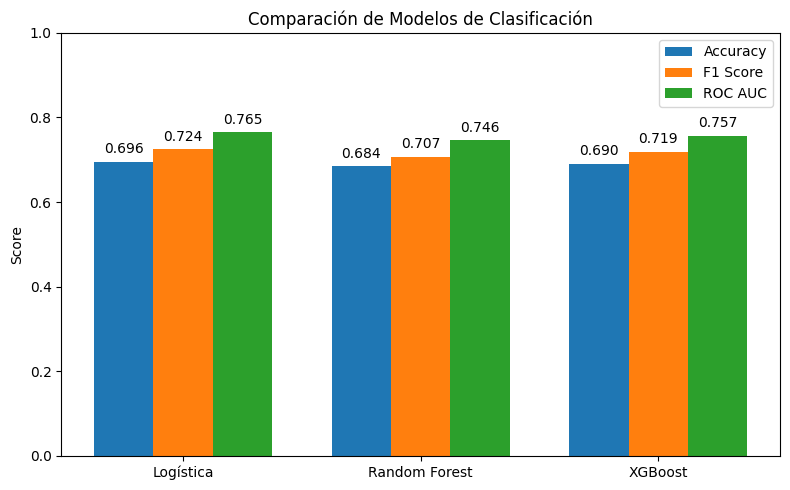

In [114]:
# ===== Datos =====
modelos = comparacion["Modelo"]
accuracy = comparacion["Accuracy"]
f1 = comparacion["F1"]
auc = comparacion["AUC"]

x = np.arange(len(modelos))
width = 0.25

# ===== Plot =====
plt.figure(figsize=(8,5))

b1 = plt.bar(x - width, accuracy, width, label="Accuracy")
b2 = plt.bar(x, f1, width, label="F1 Score")
b3 = plt.bar(x + width, auc, width, label="ROC AUC")

plt.xticks(x, modelos)
plt.ylim(0, 1)
plt.ylabel("Score")
plt.title("Comparación de Modelos de Clasificación")
plt.legend()

# valores encima de las barras
for bars in [b1, b2, b3]:
    for bar in bars:
        h = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, h + 0.02, f"{h:.3f}", ha='center')

plt.tight_layout()
plt.show()


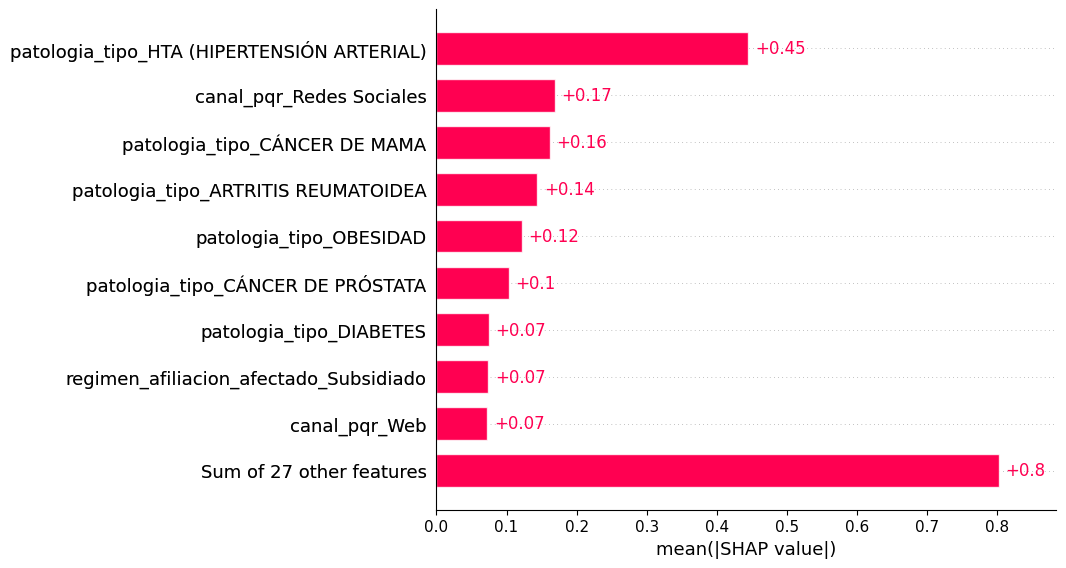

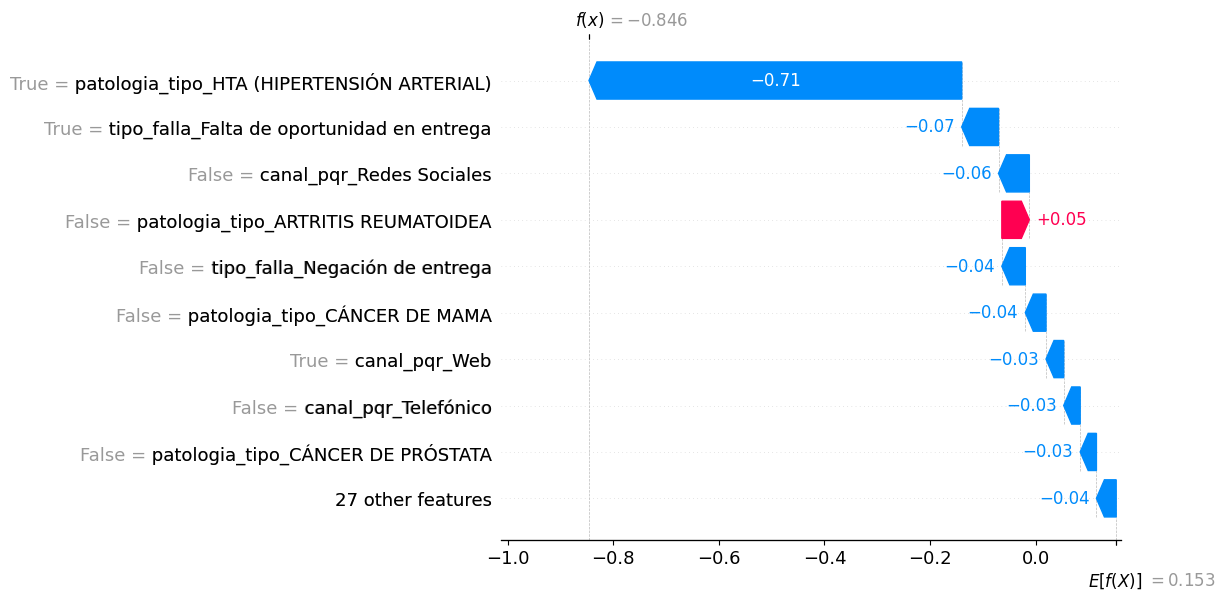

In [115]:
import shap

explainer = shap.Explainer(xgb)
shap_values = explainer(X_test)

shap.plots.bar(shap_values)        # importancia global
shap.plots.waterfall(shap_values[0])  # explicación individual


Probabilidad y uso responsable

In [116]:
df_modelo["prob_riesgo_vida"] = modelo.predict_proba(X)[:, 1]
df_modelo["prob_riesgo_vida"].describe()

,prob_riesgo_vida
count,9955.000000
mean,0.534652
std,0.234356
min,0.054650
25%,0.320394
50%,0.581101
75%,0.657535
max,0.999498


In [117]:
df_modelo[df_modelo["prob_riesgo_vida"] > 0.6].head()

,riesgo_bin,patologia_tipo_ARTRITIS REUMATOIDEA,patologia_tipo_CÁNCER COLORECTAL,patologia_tipo_CÁNCER DE MAMA,patologia_tipo_CÁNCER DE PRÓSTATA,patologia_tipo_CÁNCER DE PULMÓN,patologia_tipo_CÁNCER DE ÚTERO,patologia_tipo_CÁNCER GÁSTRICO,patologia_tipo_DIABETES,patologia_tipo_ENFERMEDAD CARDIOVASCULAR QUE REQUIERA CIRUGÍA,...,rango_edad_afectado_DE 25 A 29 AÑOS,rango_edad_afectado_DE 30 A 37 AÑOS,rango_edad_afectado_DE 38 A 49 AÑOS,rango_edad_afectado_DE 50 A 62 AÑOS,rango_edad_afectado_DE 6 A 12 AÑOS,rango_edad_afectado_MAYOR DE 63 AÑOS,regimen_afiliacion_afectado_No aplica,regimen_afiliacion_afectado_Régimen Especial,regimen_afiliacion_afectado_Subsidiado,prob_riesgo_vida
2,1,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,True,0.631855
3,0,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,0.659666
4,1,False,False,False,False,False,False,False,True,False,...,False,False,False,True,False,False,False,False,False,0.641457
5,1,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,0.829509
7,1,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,True,0.741302


In [118]:
# =====================
# Predicciones
# =====================
y_pred = modelo.predict(X_test)
y_prob = modelo.predict_proba(X_test)[:,1]

# =====================
# Métricas
# =====================
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_prob)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1:", f1)
print("AUC:", auc)

Accuracy: 0.6956812855708069
Precision: 0.6951716114019779
Recall: 0.7563291139240507
F1: 0.7244619581691422
AUC: 0.7651752539292688


In [119]:
metricas = pd.DataFrame({
    "Metrica": ["Accuracy", "Precision", "Recall", "F1-score", "AUC-ROC"],
    "Valor": [accuracy, precision, recall, f1, auc]
})

metricas


,Metrica,Valor
0,Accuracy,0.695681
1,Precision,0.695172
2,Recall,0.756329
3,F1-score,0.724462
4,AUC-ROC,0.765175


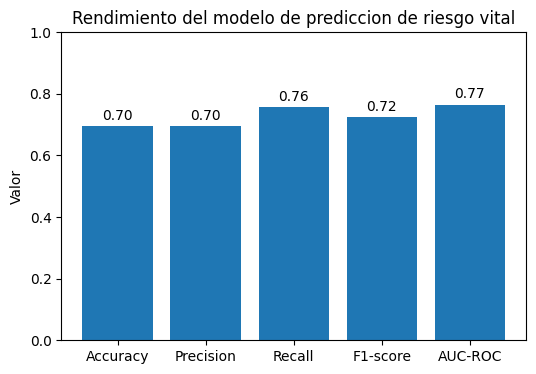

In [120]:
plt.figure(figsize=(6,4))

bars = plt.bar(metricas["Metrica"], metricas["Valor"])

plt.ylim(0,1)
plt.title("Rendimiento del modelo de prediccion de riesgo vital")
plt.ylabel("Valor")

# mostrar números encima de cada barra
for i, v in enumerate(metricas["Valor"]):
    plt.text(i, v + 0.02, f"{v:.2f}", ha='center')

plt.show()


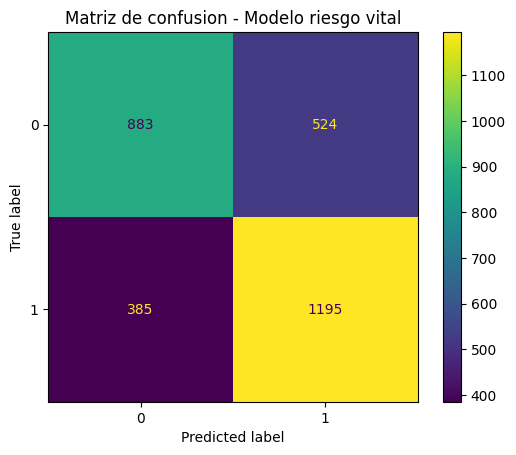

[[ 883  524]
 [ 385 1195]]


In [121]:

# matriz
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

plt.title("Matriz de confusion - Modelo riesgo vital")
plt.show()

print(cm)
